In [40]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df=pd.read_csv('cancer_data.csv')

In [21]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])


In [22]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [31]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_p = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_p)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.6228


In [32]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
for train_idx, test_idx in kfold.split(X_train):
    kfold_X_train, kfold_X_val = X_train.iloc[train_idx], X_train.iloc[test_idx]
    kfold_y_train, kfold_y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    kfold_clf = LogisticRegression()
    kfold_clf.fit(kfold_X_train, kfold_y_train)
    kfold_val_preds = kfold_clf.predict(kfold_X_val)
    fold_score = accuracy_score(kfold_y_val, kfold_val_preds)
    fold_scores.append(fold_score)

avg_fold_score = sum(fold_scores) / len(fold_scores)
print(f'Average k-fold cross-validation accuracy: {avg_fold_score:.4f}')

Average k-fold cross-validation accuracy: 0.5011


In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=35)

In [34]:
clf=LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [35]:
train_preds = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
train_error_rate = 1 - train_accuracy
train_precision = precision_score(y_train, train_preds)
train_recall = recall_score(y_train, train_preds)
train_f1_score = f1_score(y_train, train_preds)
train_confusion_matrix = confusion_matrix(y_train, train_preds)
train_sensitivity = train_confusion_matrix[1, 1] / (train_confusion_matrix[1, 0] + train_confusion_matrix[1, 1])
train_specificity = train_confusion_matrix[0, 0] / (train_confusion_matrix[0, 0] + train_confusion_matrix[0, 1])
print('Training set metrics:')
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Error Rate: {train_error_rate:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1-Score: {train_f1_score:.4f}')
print(f'Sensitivity: {train_sensitivity:.4f}')
print(f'Specificity: {train_specificity:.4f}')
print('Confusion Matrix:')
print(train_confusion_matrix)

Training set metrics:
Accuracy: 0.6209
Error Rate: 0.3791
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Sensitivity: 0.0000
Specificity: 1.0000
Confusion Matrix:
[[226   0]
 [138   0]]


c:\Users\tofee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
test_preds = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
test_error_rate = 1 - test_accuracy
test_precision = precision_score(y_test, test_preds)
test_recall = recall_score(y_test, test_preds)
test_f1_score = f1_score(y_test, test_preds)
test_confusion_matrix = confusion_matrix(y_test, test_preds)
test_sensitivity = test_confusion_matrix[1, 1] / (test_confusion_matrix[1, 0] + test_confusion_matrix[1, 1])
test_specificity = test_confusion_matrix[0, 0] / (test_confusion_matrix[0, 0] + test_confusion_matrix[0, 1])
print('\nTest set metrics:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Error Rate: {test_error_rate:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1-Score: {test_f1_score:.4f}')
print(f'Sensitivity: {test_sensitivity:.4f}')
print(f'Specificity: {test_specificity:.4f}')
print('Confusion Matrix:')
print(test_confusion_matrix)


Test set metrics:
Accuracy: 0.6228
Error Rate: 0.3772
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Sensitivity: 0.0000
Specificity: 1.0000
Confusion Matrix:
[[71  0]
 [43  0]]


c:\Users\tofee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
val_preds = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, val_preds)
val_error_rate = 1 - val_accuracy
val_precision = precision_score(y_val, val_preds)
val_recall = recall_score(y_val, val_preds)
val_f1_score = f1_score(y_val, val_preds)
val_confusion_matrix = confusion_matrix(y_val, val_preds)
val_sensitivity = val_confusion_matrix[1, 1] / (val_confusion_matrix[1, 0] + val_confusion_matrix[1, 1])
val_specificity = val_confusion_matrix[0, 0] / (val_confusion_matrix[0, 0] + val_confusion_matrix[0, 1])
print('\nValidation set metrics:')
print(f'Accuracy: {val_accuracy:.4f}')
print(f'Error Rate: {val_error_rate:.4f}')
print(f'Precision: {val_precision:.4f}')
print(f'Recall: {val_recall:.4f}')
print(f'F1-Score: {val_f1_score:.4f}')
print(f'Sensitivity: {val_sensitivity:.4f}')
print(f'Specificity: {val_specificity:.4f}')
print('Confusion Matrix:')
print(val_confusion_matrix)


Validation set metrics:
Accuracy: 0.6593
Error Rate: 0.3407
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Sensitivity: 0.0000
Specificity: 1.0000
Confusion Matrix:
[[60  0]
 [31  0]]


c:\Users\tofee\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


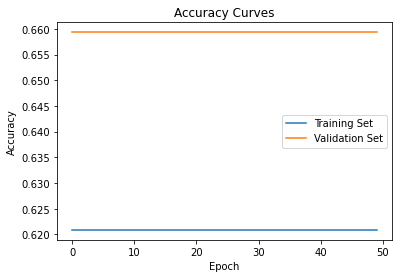

In [41]:
train_accs = []
val_accs = []
for epoch in range(50):
    clf.fit(X_train, y_train)
    train_preds = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_preds)
    val_preds = clf.predict(X_val)
    val_acc = accuracy_score(y_val, val_preds)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

plt.plot(train_accs, label='Training Set')
plt.plot(val_accs, label='Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')
plt.legend()
plt.show()